### Integer Programming

Matched Treatment Plan:
          ID  Treated  Pain_Score  Urgency_Score  Frequency_Score  \
0  Patient_1        1           3              4                2   
1  Patient_2        0           2              6                5   
2  Patient_3        0           6              5                0   
3  Patient_4        0           7              0                6   
4  Patient_5        1           3              4                0   

        Treatment_Time  Matched_Treatment  
0  2025-02-10 20:26:56                0.0  
1                    0                0.0  
2                    0                0.0  
3                    0                0.0  
4  2025-02-10 05:26:39                0.0  


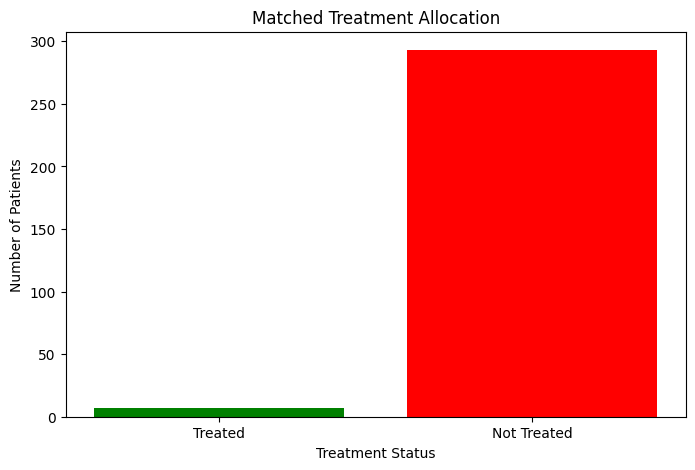

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

data = pd.read_csv("../Datasets/patient_treatment_data.csv")

data['Treated'] = data['Treated'].apply(lambda x: 1 if x == 'Yes' else 0)

data.fillna(0, inplace=True)

num_patients = len(data)

c = -np.ones(num_patients)  # Objective: maximize treated patients

# Constraints for matched sampling (ensuring balance in treatment groups based on scores)
A_eq = np.vstack([data['Pain_Score'].values, data['Urgency_Score'].values, data['Frequency_Score'].values])
b_eq = np.mean(A_eq, axis=1)  # Balance groups based on mean scores

# each patient is either 0 (not treated) or 1 (treated)
bounds = [(0, 1)] * num_patients

# Solve the integer programming problem using linear programming relaxation
res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Convert the solution to binary values
data['Matched_Treatment'] = np.round(res.x)

# Display the first few rows of the updated dataframe
print("Matched Treatment Plan:")
print(data.head())

# Visualization of Matched Treatment Distribution**
treated_count = int(data['Matched_Treatment'].sum())
non_treated_count = len(data) - treated_count

# Create a bar chart for visualization
plt.figure(figsize=(8, 5))
plt.bar(['Treated', 'Not Treated'], [treated_count, non_treated_count], color=['green', 'red'])
plt.xlabel("Treatment Status")
plt.ylabel("Number of Patients")
plt.title("Matched Treatment Allocation")
plt.show()
